Exercise 2

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Lambda = [[0, 2/5, 1/5, 0, 0],
          [0, 0, 3/4, 1/4, 0],
          [1/2, 0, 0, 1/2, 0],
          [0, 0, 1/3, 0, 2/3],
          [0, 1/3, 0, 1/3, 0]]

In [3]:
w = np.sum(Lambda, axis=1)
w_star = np.max(w)
# compute the off-diagonal part of Q
Q = Lambda/w_star 
# add the diagonal part
Q = Q + np.diag(np.ones(len(w))-np.sum(Q,axis=1))

# compute dominant eigenvector
values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print("pi_bar=", pi_bar)

n_states = len(pi_bar)

pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


In [4]:
t_next = -np.log(np.random.rand())/(100*w[0])
t_next

0.0031583549009903274

In [5]:
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

In [6]:
n_nodes = 5

In [7]:
n_simul = 100
n_part = np.array([100,0,0,0,0])
prob_nodes = [n_part[0]/100, n_part[1]/100, n_part[2]/100,n_part[3]/100,n_part[4]/100]

n_part_time= np.array([100,0,0,0,0])
n_part_time_final=np.zeros(5)

for k in range (1,n_simul):
    n_part = np.array([100,0,0,0,0])
    n_part_time= np.array([100,0,0,0,0])
    sum_tnext = 0
    while (sum_tnext <= 60):
        prob_nodes = [n_part[0]/100, n_part[1]/100, n_part[2]/100,n_part[3]/100,n_part[4]/100]
        chosen_node = np.random.choice (n_nodes, p=prob_nodes)
        pos = np.random.choice(n_states, p = Q[chosen_node,:])
        n_part[chosen_node] -=1
        n_part[pos] += 1
        sum_tnext += -np.log(np.random.rand())/(w_star*100)
        #print(n_part)
        n_part_time = np.row_stack((n_part_time,n_part))
        #print(len(n_part_time))
    
    
    n_part_time_final = np.add(n_part_time_final,n_part_time[-1])
    avg_node = n_part_time_final/n_simul
    
    

In [8]:
len(n_part_time)

5891

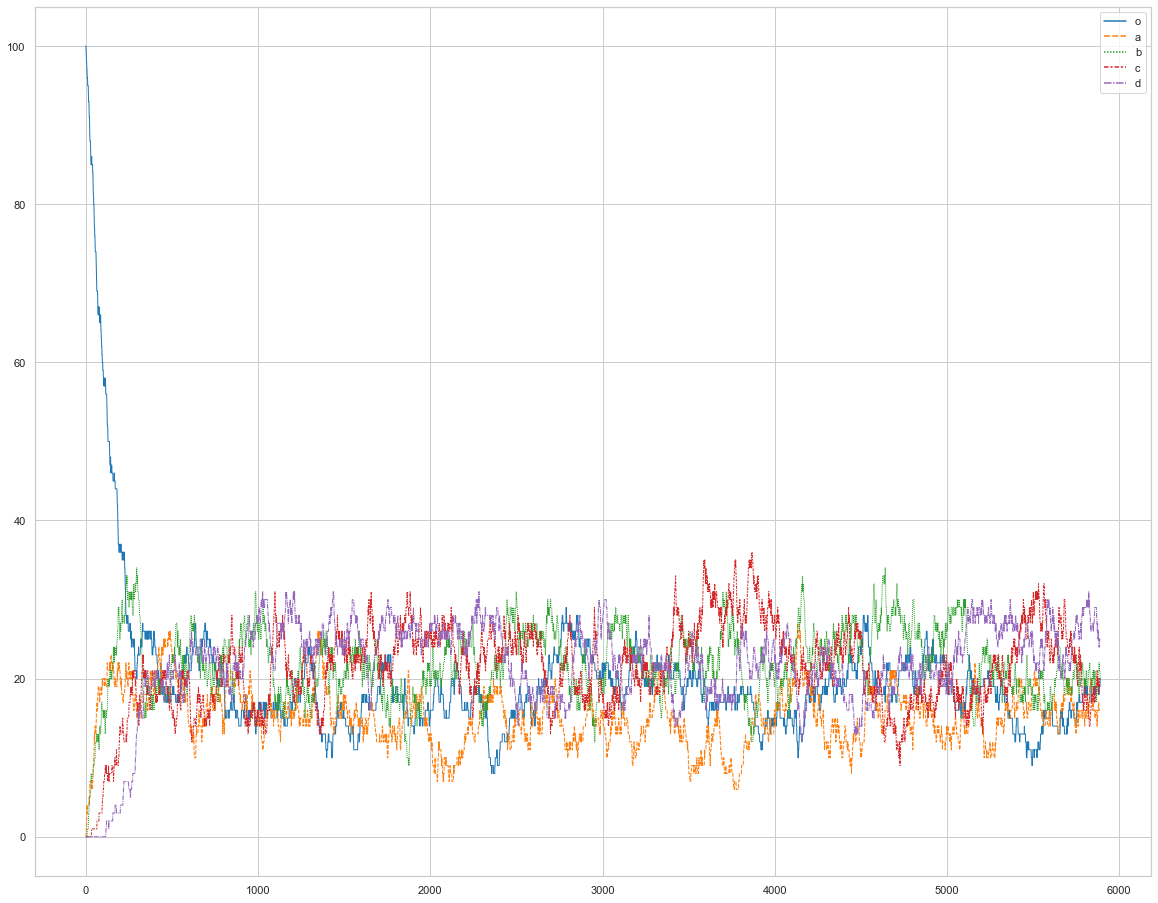

In [10]:
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(20,16)})
sns.set_theme(style="whitegrid")
values = n_part_time
time=np.arange(0,5891)
data = pd.DataFrame(values, time, columns=["o", "a", "b", "c","d"])
sns.lineplot(data=data, palette="tab10", linewidth=1)
plt.savefig("ex2.svg")